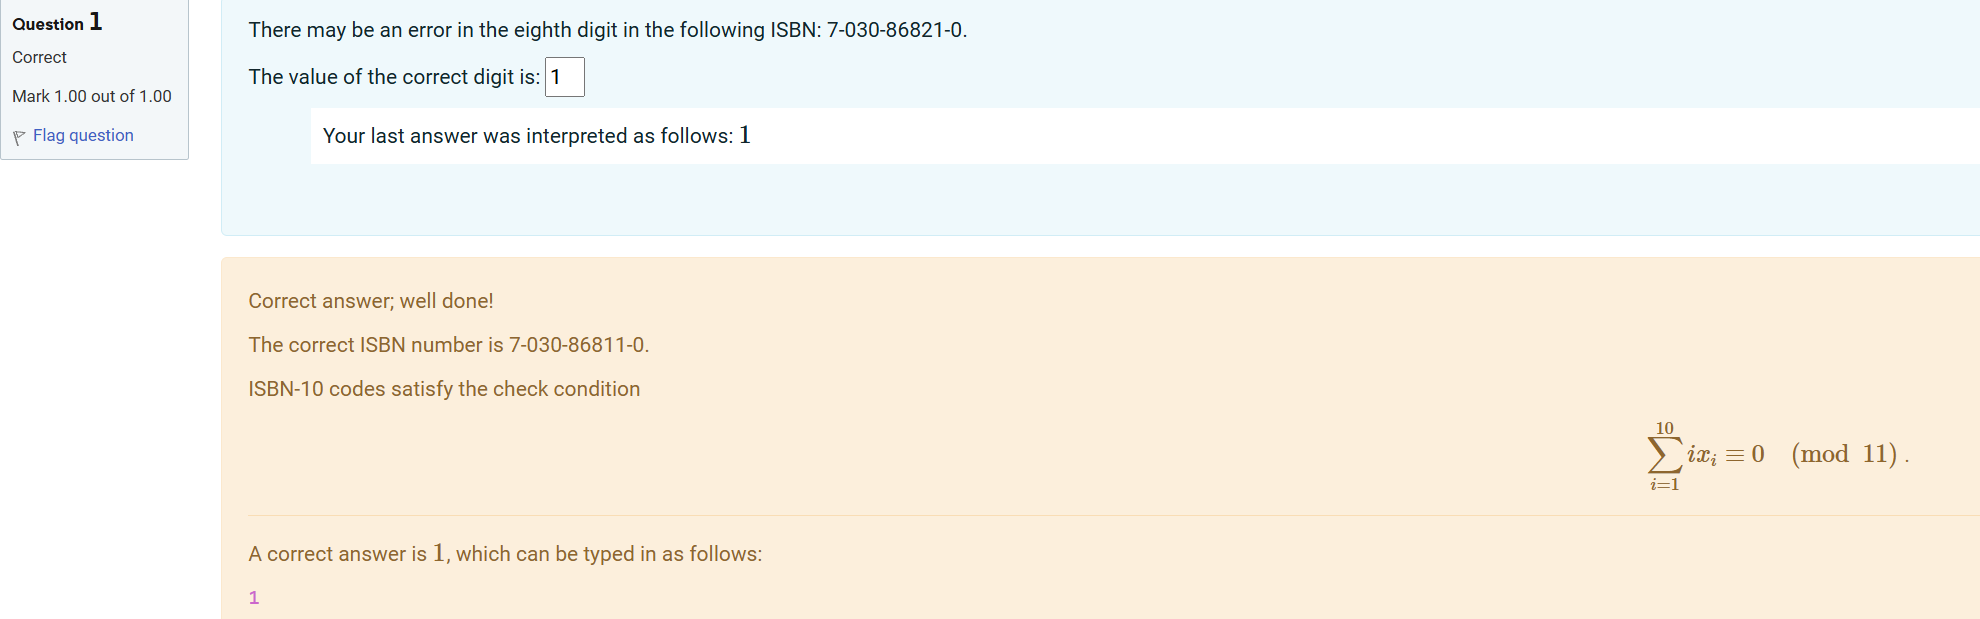

In [2]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q1.png')

There may be an error in the eighth digit in the following ISBN: 7-030-86821-0.

The value of the correct digit is:  


In [1]:
'''
there may be an error in the fourth digit in the following ISBN: 3-965-59422-9. the value of the correct digit is...
'''
def calculate_isbn_check_digit(isbn):
    total = 0
    for i, digit in enumerate(isbn[:9], start=1):
        total += i * int(digit)
    return total % 11

def find_correct_digit(isbn, error_index):
    isbn = isbn.replace("-", "")
    given_check_digit = int(isbn[-1])
    error_index -= 1 # Convert 1-based index to 0-base
    
    for replacement_digit in range(10): # Try each possible digit for the specified position
        candidate_isbn = isbn[:error_index] + str(replacement_digit) + isbn[error_index + 1:-1] # Replace the specified digit with the current guess
        calculated_check_digit = calculate_isbn_check_digit(candidate_isbn) # Calculate the check digit for the candidate ISBN
        if calculated_check_digit == given_check_digit: # Check if the calculated check digit matches the given check digit
            return replacement_digit
    raise ValueError("Could not find a valid replacement digit.")

#v v v v v v v v v v v v v v v CHANGE THIS v v v v v v v v v v v v v v v v v v v v v
isbn = "7-030-86821-0"
error_index = 8  # 1-based index of incorrect digit

print(f"correct {error_index}-th digit: {find_correct_digit(isbn, error_index)}")

correct 8-th digit: 1


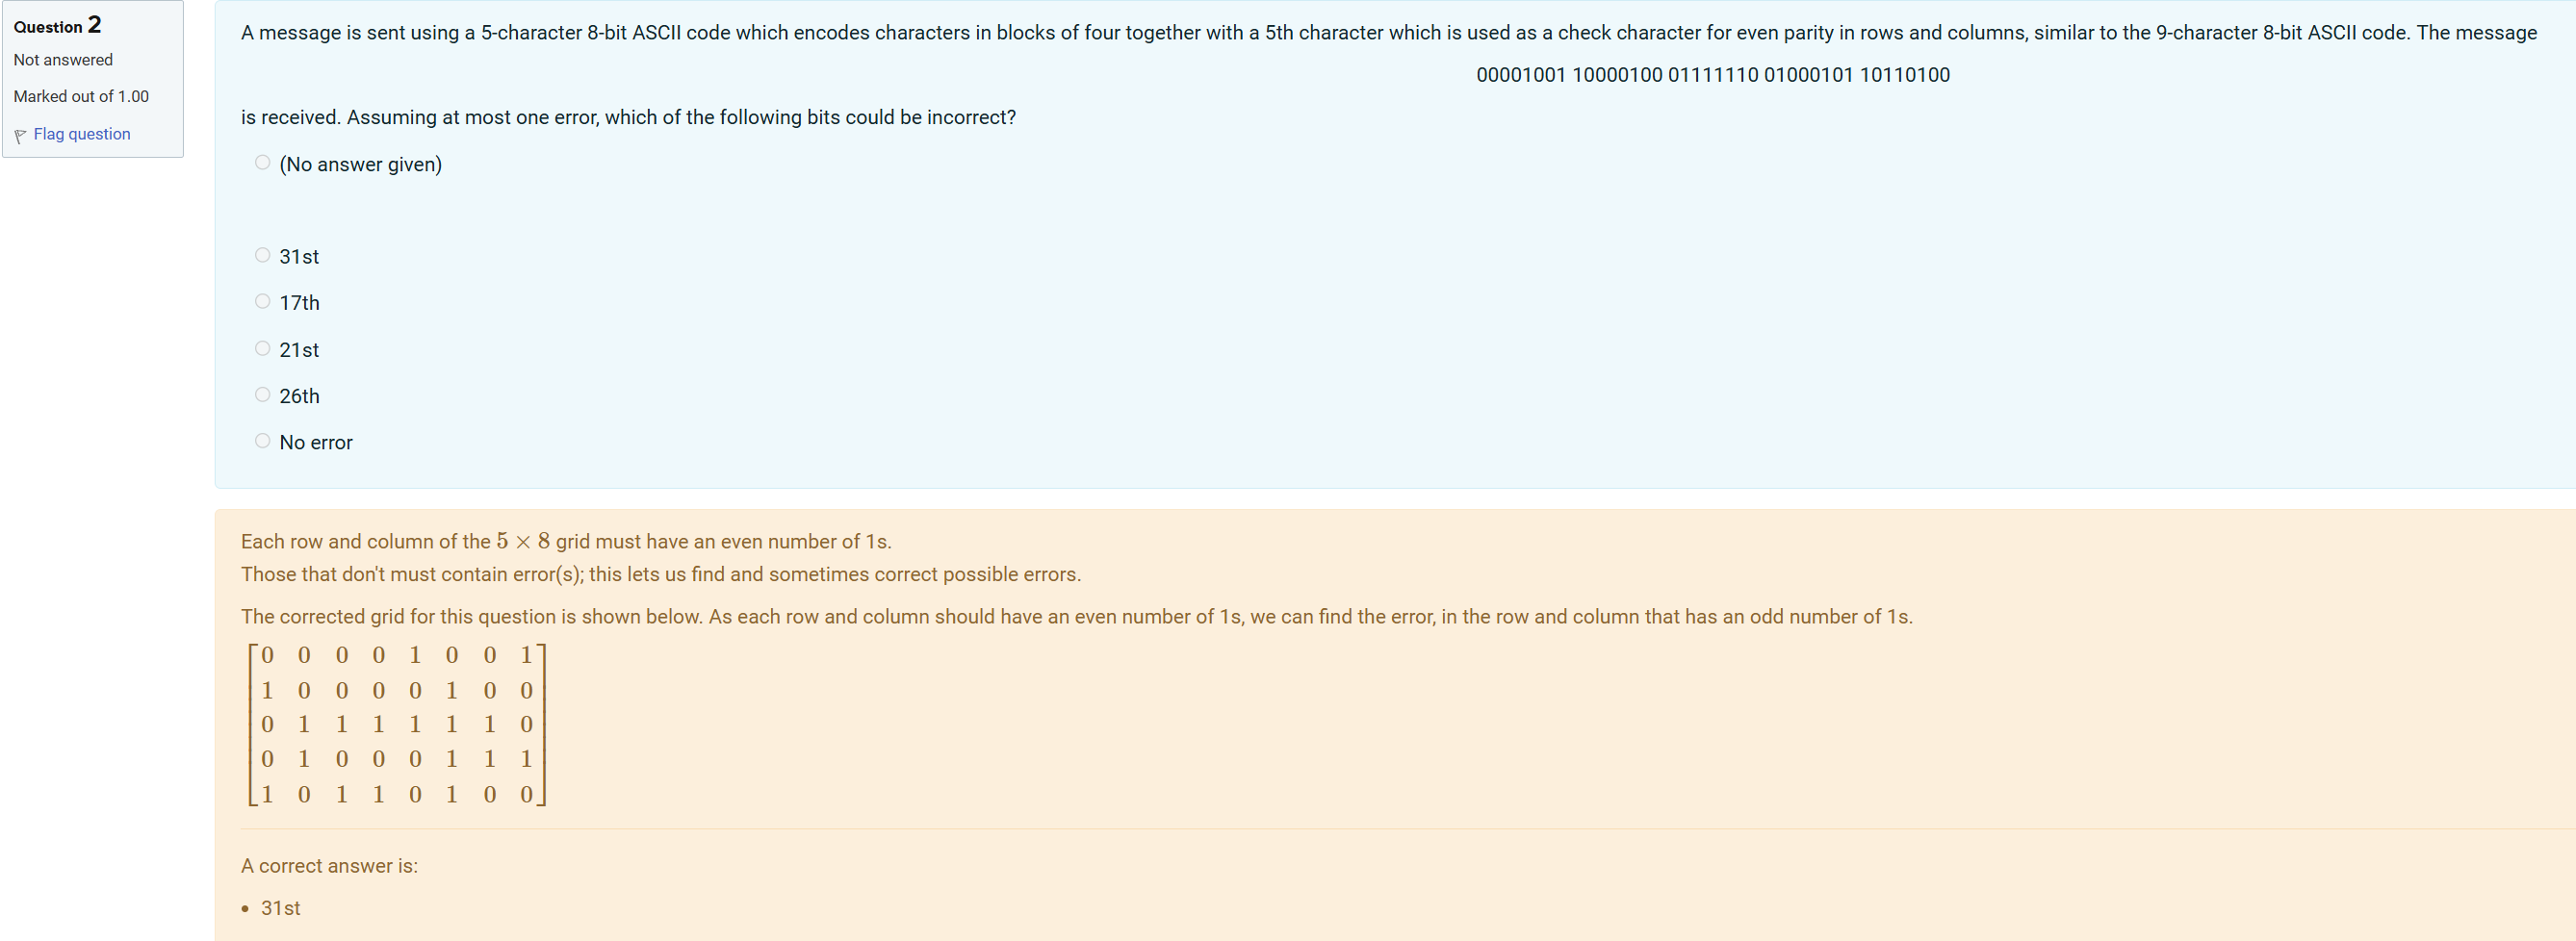

In [3]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q2.png')

A message is sent using a 5-character 8-bit ASCII code which encodes characters in blocks of four together with a 5th character which is used as a check character for even parity in rows and columns, similar to the 9-character 8-bit ASCII code. The message

$$
00001001 \ 10000100 \ 01111110 \ 01000101 \ 10110100
$$

is received. Assuming at most one error, which of the following bits could be incorrect?

Options:
1. 31st  
2. 17th  
3. 21st  
4. 26th  
5. No error


In [4]:
def create_grid(bitstring):
    """Convert the 40-bit string into a 5x8 grid"""
    # Split string into groups of 8 bits
    rows = [bitstring[i:i+8] for i in range(0, 40, 8)]
    # Convert to integers for easier manipulation
    return [[int(bit) for bit in row] for row in rows]

def check_row_parity(grid):
    """Check which rows have odd parity (odd number of 1s)"""
    odd_rows = []
    for i, row in enumerate(grid):
        if sum(row) % 2 != 0:
            odd_rows.append(i)
    return odd_rows

def check_column_parity(grid):
    """Check which columns have odd parity (odd number of 1s)"""
    odd_cols = []
    for col in range(8):
        column_sum = sum(grid[row][col] for row in range(5))
        if column_sum % 2 != 0:
            odd_cols.append(col)
    return odd_cols

def find_potential_error(grid):
    """Find potential error position based on row and column parity"""
    odd_rows = check_row_parity(grid)
    odd_cols = check_column_parity(grid)
    
    print(f"Rows with odd parity: {odd_rows}")
    print(f"Columns with odd parity: {odd_cols}")
    
    if len(odd_rows) == 0 and len(odd_cols) == 0:
        return "No error detected"
    elif len(odd_rows) == 1 and len(odd_cols) == 1:
        row = odd_rows[0]
        col = odd_cols[0]
        position = row * 8 + col + 1  # +1 for 1-based position
        return f"Error detected at position {position} (row {row+1}, column {col+1})"
    else:
        return "Multiple errors detected or parity inconsistency"

def print_grid(grid):
    """Print the grid in a readable format"""
    print("\nGrid representation:")
    for row in grid:
        print(" ".join(str(bit) for bit in row))

# The received message
message = "00001001 10000100 01111110 01000101 10110100"
# Remove spaces and create grid
message = message.replace(" ", "")
grid = create_grid(message)

# Print initial state
print("Analyzing message for errors...")
print_grid(grid)

# Check for errors
result = find_potential_error(grid)
print("\nAnalysis result:")
print(result)

# Map the bit positions to the options given
positions_map = {
    31: "31st",
    17: "17th",
    21: "21st",
    26: "26th"
}

# If we found a specific error position, check if it matches any of the given options
if "Error detected at position" in result:
    error_pos = int(result.split("position ")[1].split(" ")[0])
    print(f"\nThe error is at position {error_pos}")
    if error_pos in positions_map:
        print(f"This corresponds to the {positions_map[error_pos]} bit option")
    else:
        print("This position doesn't match any of the given options")

Analyzing message for errors...

Grid representation:
0 0 0 0 1 0 0 1
1 0 0 0 0 1 0 0
0 1 1 1 1 1 1 0
0 1 0 0 0 1 0 1
1 0 1 1 0 1 0 0
Rows with odd parity: [3]
Columns with odd parity: [6]

Analysis result:
Error detected at position 31 (row 4, column 7)

The error is at position 31
This corresponds to the 31st bit option


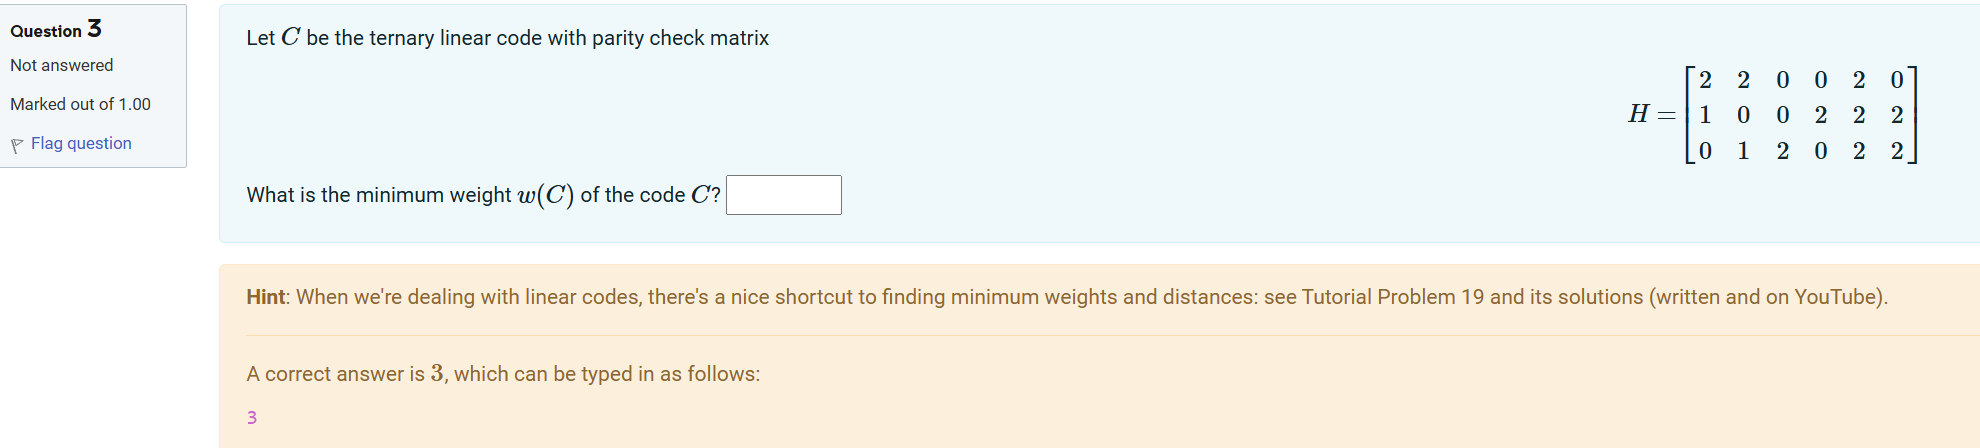

In [5]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q3.png')

Let \( \mathcal{C} \) be the ternary linear code with parity check matrix:

$$
H = 
\begin{bmatrix}
2 & 2 & 0 & 0 & 2 & 0 \\
1 & 0 & 0 & 2 & 2 & 2 \\
0 & 1 & 2 & 0 & 2 & 2
\end{bmatrix}
$$

What is the minimum weight \( w(\mathcal{C}) \) of the code \( \mathcal{C} \)?


In [12]:
import numpy as np
from itertools import combinations, product

def verify_minimum_distance_general(H, radix=3):
    """
    Calculate minimum distance/weight of a linear code
    
    Parameters:
    H: numpy array - Parity check matrix
    radix: int - Use 2 for binary codes, 3 for ternary codes
    """
    num_columns = H.shape[1]
    
    def check_linear_combination(columns, coeffs):
        """Check if a linear combination of columns equals zero mod radix"""
        selected_cols = H[:, list(columns)]
        result = np.zeros(H.shape[0], dtype=int)
        for col, coeff in zip(selected_cols.T, coeffs):
            result = (result + coeff * col) % radix
        return np.all(result == 0)
    
    # Check all possible combinations starting from 1 column
    for r in range(1, num_columns + 1):
        # Generate all possible combinations of r columns
        for cols in combinations(range(num_columns), r):
            # Generate all possible non-zero coefficient combinations
            for coeffs in product(range(1, radix), repeat=r):
                if check_linear_combination(cols, coeffs):
                    # Found a valid codeword - return its weight
                    return r
    
    return num_columns

# Define the ternary parity check matrix
H = np.array([
    [2, 2, 0, 0, 2, 0],
    [1, 0, 0, 2, 2, 2],
    [0, 1, 2, 0, 2, 2]
])
radix = 3

# Calculate parameters
min_dist = verify_minimum_distance_general(H, radix)

print(f"Parameters for the ternary linear code:")
print(f"Minimum distance d(C) or weight w(C): {min_dist}")
print(f"Maximum number of errors that can be detected: {min_dist - 1}")
print(f"Maximum number of errors that can be corrected: {(min_dist - 1) // 2}")

# Verify the result by showing an example of a minimum weight codeword
def find_example_min_weight_codeword(H, min_weight, radix=3):
    """Find an example of a minimum weight codeword"""
    num_columns = H.shape[1]
    
    def get_codeword(columns, coeffs):
        """Convert columns and coefficients to full codeword"""
        codeword = np.zeros(num_columns, dtype=int)
        for col, coeff in zip(columns, coeffs):
            codeword[col] = coeff
        return codeword
    
    for cols in combinations(range(num_columns), min_weight):
        for coeffs in product(range(1, radix), repeat=min_weight):
            if check_linear_combination(cols, coeffs):
                return get_codeword(cols, coeffs)
    return None

# Find and print an example minimum weight codeword
print("\nVerification:")
print("Checking product of H with potential minimum weight codewords...")

def check_linear_combination(columns, coeffs):
    selected_cols = H[:, list(columns)]
    result = np.zeros(H.shape[0], dtype=int)
    for col, coeff in zip(selected_cols.T, coeffs):
        result = (result + coeff * col) % radix
    return np.all(result == 0)

min_weight_codeword = find_example_min_weight_codeword(H, min_dist, radix)
if min_weight_codeword is not None:
    print(f"Example of minimum weight codeword: {min_weight_codeword}")
    # Verify it's actually a codeword
    result = np.dot(H, min_weight_codeword) % radix
    print(f"H * codeword mod {radix} = {result}")
    print(f"Weight = {np.count_nonzero(min_weight_codeword)}")

Parameters for the ternary linear code:
Minimum distance d(C) or weight w(C): 3
Maximum number of errors that can be detected: 2
Maximum number of errors that can be corrected: 1

Verification:
Checking product of H with potential minimum weight codewords...
Example of minimum weight codeword: [1 1 0 0 1 0]
H * codeword mod 3 = [0 0 0]
Weight = 3


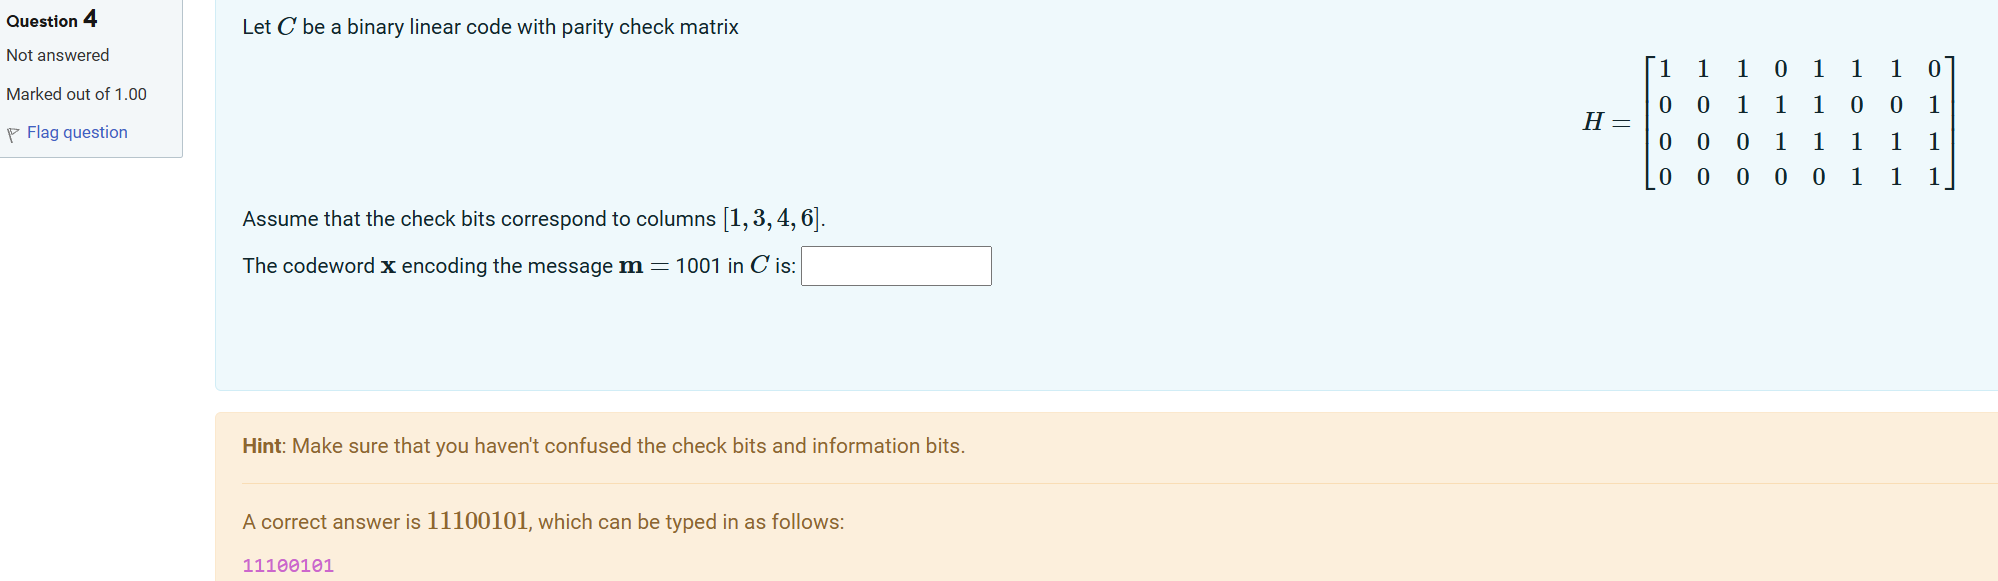

In [13]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q4.png')

Let \( \mathcal{C} \) be a binary linear code with parity check matrix:

$$
H = 
\begin{bmatrix}
1 & 1 & 1 & 0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 0 & 1 \\
0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 1 & 1
\end{bmatrix}
$$

Assume that the check bits correspond to columns \([1, 3, 4, 6]\).

The codeword \( \mathbf{x} \) encoding the message \( \mathbf{m} = 1001 \) in \( \mathcal{C} \) is:


In [15]:
import numpy as np

def solve_linear_system_mod2(A, b):
    """Solve system of linear equations Ax = b over F2"""
    A = A.copy() % 2
    b = b.copy() % 2
    nrows, ncols = A.shape
    # Create augmented matrix
    Ab = np.hstack((A, b.reshape(-1,1))) % 2
    rank = 0
    
    # Gaussian elimination
    for col in range(ncols):
        # Find pivot
        pivot_row = None
        for row in range(rank, nrows):
            if Ab[row, col] == 1:
                pivot_row = row
                break
                
        if pivot_row is None:
            continue
            
        # Swap rows if needed
        if pivot_row != rank:
            Ab[rank], Ab[pivot_row] = Ab[pivot_row].copy(), Ab[rank].copy()
            
        # Eliminate other rows
        for row in range(nrows):
            if row != rank and Ab[row, col] == 1:
                Ab[row] = (Ab[row] + Ab[rank]) % 2
        rank += 1
    
    # Check for inconsistency
    for row in range(rank, nrows):
        if Ab[row, -1] == 1:
            raise ValueError("No solution exists")
            
    # Back substitution
    x = np.zeros(ncols, dtype=int)
    for row in range(rank-1, -1, -1):
        cols = np.where(Ab[row, :-1] == 1)[0]
        if len(cols) == 0:
            continue
        col = cols[0]
        x[col] = Ab[row, -1]
        for c in cols[1:]:
            x[col] = (x[col] + x[c]) % 2
            
    return x

def encode_message(H, message, check_positions):
    """
    Encode a message using parity check matrix H
    
    Parameters:
    H: parity check matrix
    message: binary message to encode
    check_positions: list of check bit positions (1-based)
    """
    n = H.shape[1]  # Length of codeword
    
    # Convert to 0-based indexing
    check_pos = [i-1 for i in check_positions]
    
    # Get message positions (all positions not in check_positions)
    msg_pos = [i for i in range(n) if i not in check_pos]
    
    # Initialize codeword with zeros
    x = np.zeros(n, dtype=int)
    
    # Place message bits
    for i, pos in enumerate(msg_pos):
        if i < len(message):
            x[pos] = int(message[i])
    
    # Extract submatrices
    H_check = H[:, check_pos]  # Columns corresponding to check bits
    H_msg = H[:, msg_pos]      # Columns corresponding to message bits
    
    # Calculate right-hand side of equation
    rhs = (np.dot(H_msg, x[msg_pos])) % 2
    
    # Solve for check bits
    check_bits = solve_linear_system_mod2(H_check, rhs)
    
    # Place check bits in codeword
    for i, pos in enumerate(check_pos):
        x[pos] = check_bits[i]
    
    return x

# Test parameters
H = np.array([
    [1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1]
])

message = "1001"  # Message to encode
check_positions = [1, 3, 4, 6]  # Check bit positions (1-based)

# Encode message
codeword = encode_message(H, message, check_positions)

# Print results
print(f"Message: {message}")
print(f"Check positions: {check_positions}")
print(f"Codeword: {''.join(map(str, codeword))}")

# Verify result
syndrome = np.dot(H, codeword) % 2
print(f"\nVerification:")
print(f"H * codeword mod 2 = {syndrome}")
print(f"Is valid codeword? {not np.any(syndrome)}")

Message: 1001
Check positions: [1, 3, 4, 6]
Codeword: 11100101

Verification:
H * codeword mod 2 = [0 0 0 0]
Is valid codeword? True


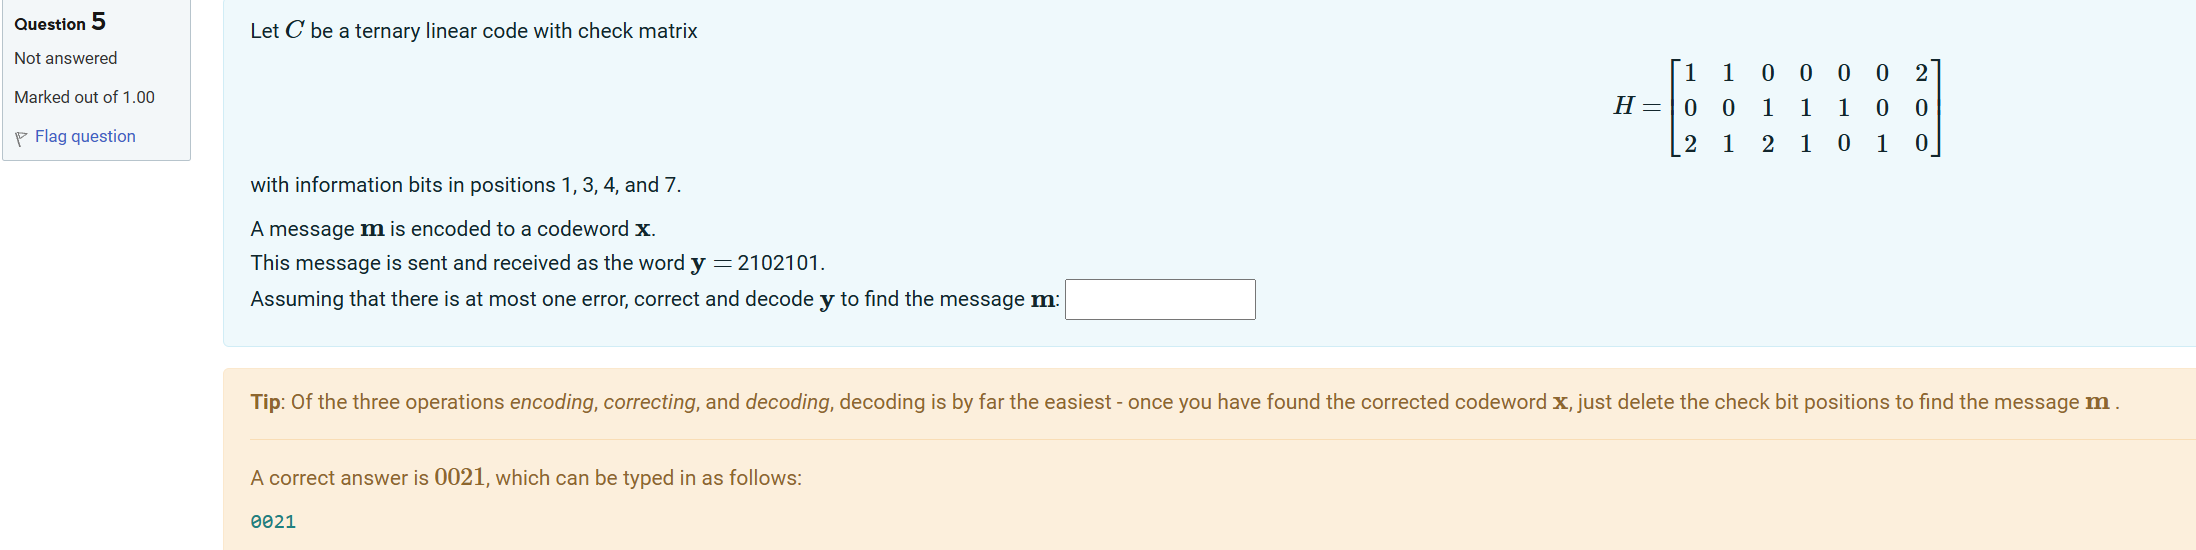

In [16]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q5.png')

Let \( \mathcal{C} \) be a ternary linear code with check matrix:

$$
H = 
\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 0 & 2 \\
0 & 0 & 1 & 1 & 1 & 0 & 0 \\
2 & 1 & 2 & 1 & 0 & 1 & 0
\end{bmatrix}
$$

with information bits in positions \(1, 3, 4,\) and \(7\).

A message \( \mathbf{m} \) is encoded to a codeword \( \mathbf{x} \).

This message is sent and received as the word \( \mathbf{y} = 2102101 \).

Assuming that there is at most one error, correct and decode \( \mathbf{y} \) to find the message \( \mathbf{m} \):


In [19]:
import numpy as np

# --------------- CORE FUNCTIONS (don't need to change these) ---------------

def correct_error(H, y, radix=3):
    """
    Correct at most one error in a received word y
    H: parity check matrix
    y: received word
    radix: 2 for binary, 3 for ternary (default)
    """
    y = np.array(y)
    
    # Compute syndrome S = Hy mod radix
    syndrome = np.dot(H, y) % radix
    print(f"Syndrome S(y) = {syndrome}")
    
    # Check if no error (syndrome = 0)
    if np.all(syndrome == 0):
        print("No error detected")
        return y
    
    # For each position and possible error value
    for pos in range(len(y)):
        h_col = H[:, pos]  # Get column of H
        # Try each possible error value
        for error in range(radix):
            # Check if this error explains the syndrome
            test_syndrome = (error * h_col) % radix
            if np.array_equal(test_syndrome, syndrome):
                y_corrected = y.copy()
                y_corrected[pos] = (y[pos] - error) % radix
                print(f"Error found at position {pos+1} with value {error}")
                return y_corrected
    
    print("Unable to correct error")
    return y

def decode_message(codeword, info_positions):
    """
    Extract message bits from corrected codeword
    codeword: the corrected codeword
    info_positions: positions of information bits (1-based indexing)
    """
    info_pos = [i-1 for i in info_positions]  # Convert to 0-based indexing
    return [codeword[i] for i in info_pos]

def find_error_pattern(H, syndrome, radix=3):
    """
    Find error pattern by checking each column with each possible value
    Returns the error pattern if found, None otherwise
    """
    for pos in range(H.shape[1]):
        col = H[:, pos]
        for val in range(radix):
            if np.array_equal((val * col) % radix, syndrome):
                error = np.zeros(H.shape[1], dtype=int)
                error[pos] = val
                return error
    return None

# --------------- PARAMETERS TO CHANGE FOR DIFFERENT PROBLEMS ---------------

# 1. CHANGE THIS: Define your parity check matrix H
H = np.array([
    [1, 1, 0, 0, 0, 0, 2],
    [0, 0, 1, 1, 1, 0, 0],
    [2, 1, 2, 1, 0, 1, 0]
])

# 2. CHANGE THIS: Define your received word y
y = [2, 1, 0, 2, 1, 0, 1]  # Replace with your received word

# 3. CHANGE THIS: Define information bit positions
info_positions = [1, 3, 4, 7]  # Replace with your info positions (1-based)

# --------------- MAIN EXECUTION (usually doesn't need changing) ---------------

print("Input parameters:")
print(f"Received word y: {y}")
print(f"Information positions: {info_positions}")

# Compute syndrome
syndrome = np.dot(H, y) % 3
print(f"\nSyndrome S(y) = {syndrome}")

# Find and correct error
error_pattern = find_error_pattern(H, syndrome)

if error_pattern is not None:
    corrected = (np.array(y) - error_pattern) % 3
    print(f"Error pattern found: {error_pattern}")
else:
    corrected = y
    print("No error pattern found")

print(f"\nCorrected codeword: {corrected}")

# Get message from corrected codeword
message = decode_message(corrected, info_positions)
print(f"Decoded message m: {message}")

# Verify result
final_syndrome = np.dot(H, corrected) % 3
print(f"\nVerification:")
print(f"Final syndrome: {final_syndrome}")
print(f"Is valid codeword? {np.all(final_syndrome == 0)}")

Input parameters:
Received word y: [2, 1, 0, 2, 1, 0, 1]
Information positions: [1, 3, 4, 7]

Syndrome S(y) = [2 0 1]
Error pattern found: [2 0 0 0 0 0 0]

Corrected codeword: [0 1 0 2 1 0 1]
Decoded message m: [0, 0, 2, 1]

Verification:
Final syndrome: [0 0 0]
Is valid codeword? True


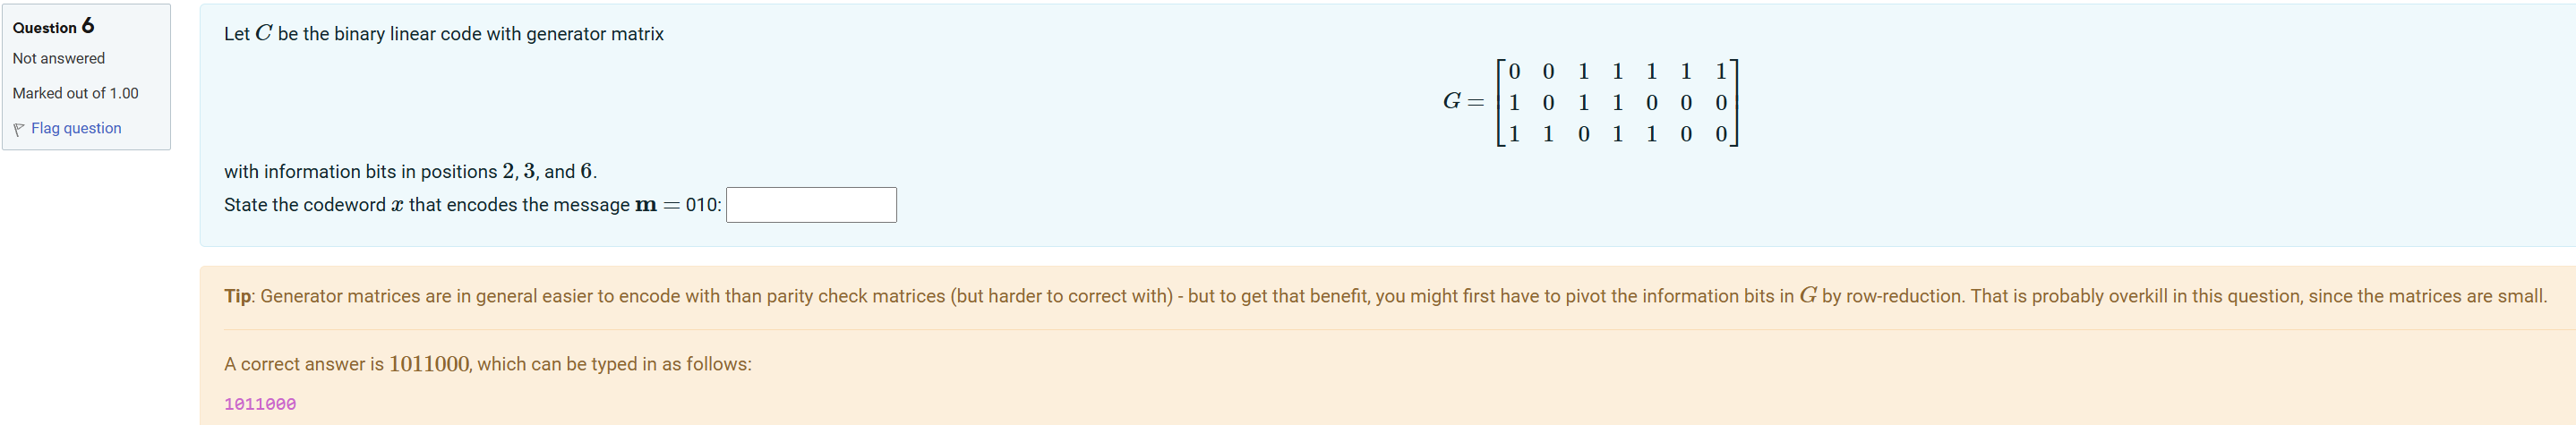

In [21]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q6.png')

Let C be the binary linear code with generator matrix:

$$
G = 
\begin{bmatrix}
0 & 0 & 1 & 1 & 1 & 1 \\
1 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 & 0
\end{bmatrix}
$$

with information bits in positions \(2, 3,\) and \(6\).

State the codeword \( \mathbf{x} \) that encodes the message \( \mathbf{m} = 010 \):


In [1]:
import numpy as np

def gf2_gaussian_elimination(G):
    """
    Performs Gaussian elimination over GF(2) (binary field) to bring G into systematic form.
    This function doesn't need modification for different problems.
    """
    G = G.copy()
    num_rows, num_cols = G.shape
    pivot_row = 0
    
    for pivot_col in range(num_cols):
        # Find a row with a leading 1 in the current column
        for i in range(pivot_row, num_rows):
            if G[i, pivot_col] == 1:
                # Swap rows to get the pivot in the correct position
                G[[pivot_row, i]] = G[[i, pivot_row]]
                break
        else:
            # Skip if no pivot found in this column
            continue
            
        # Eliminate 1s above and below the pivot (XOR operations in GF(2))
        for i in range(num_rows):
            if i != pivot_row and G[i, pivot_col] == 1:
                G[i] = (G[i] + G[pivot_row]) % 2
        
        pivot_row += 1
        if pivot_row == num_rows:
            break
            
    return G

def encode_message(G, m, info_pos):
    """
    Encodes a message using a generator matrix and specified information positions.
    
    Parameters to modify for different problems:
    - G: The generator matrix
    - m: The message to encode
    - info_pos: The positions of information bits (1-based indexing)
    """
    # Convert from 1-based to 0-based indexing
    info_pos = [i - 1 for i in info_pos]
    total_positions = G.shape[1]
    
    # Create new column ordering with info positions first
    new_order = info_pos + [i for i in range(total_positions) if i not in info_pos]
    
    # Rearrange G to put information positions first
    G_rearranged = G[:, new_order]
    
    # Get systematic form of the rearranged matrix
    G_sys = gf2_gaussian_elimination(G_rearranged)
    
    # Extract the P matrix (parity check part)
    k = len(info_pos)  # number of information bits
    P = G_sys[:k, k:]
    
    # Calculate parity bits using P matrix
    m = np.array(m).reshape(1, -1)
    parity_bits = (np.dot(m, P) % 2).astype(int).flatten()
    
    # Combine message and parity bits
    codeword = np.concatenate((m.flatten(), parity_bits))
    
    # Rearrange back to original bit positions
    inverse_order = np.argsort(new_order)
    full_codeword = np.zeros(total_positions, dtype=int)
    full_codeword[new_order] = codeword
    
    return full_codeword.tolist()

# MODIFY THESE PARAMETERS FOR DIFFERENT PROBLEMS:
# =============================================
# 1. Generator matrix G - Change the matrix elements according to the problem
G = np.array([
    [0, 0, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0]
])

# 2. Message m - Change this to your input message
m = [0, 1, 0]

# 3. Information bit positions - Change these positions according to the problem
info_pos = [2, 3, 6]  # Using 1-based indexing as given in problems
# =============================================

# Encode the message
codeword = encode_message(G, m, info_pos)
print("The codeword x that encodes the message m = 010 is:", codeword)


The codeword x that encodes the message m = 010 is: [1, 0, 1, 1, 0, 0, 0]


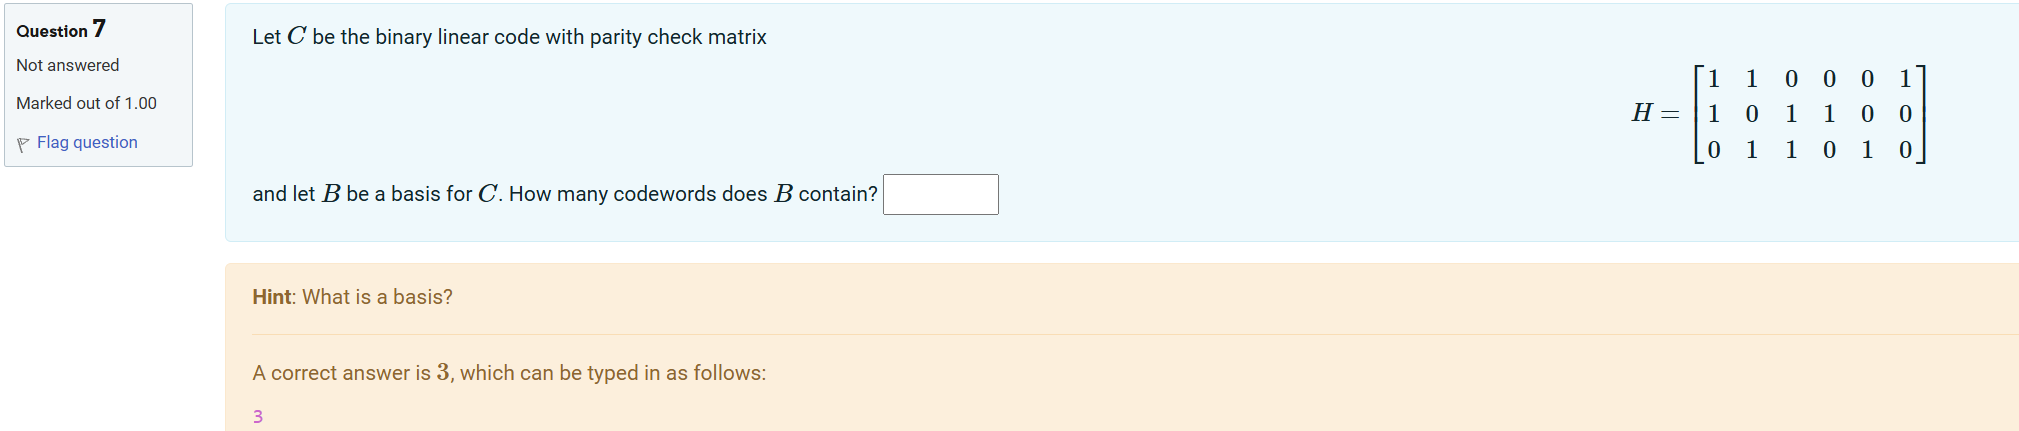

In [2]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q7.png')

Let \( \mathcal{C} \) be the binary linear code with parity check matrix:

$$
H = 
\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 1 \\
1 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 0 & 1 & 0
\end{bmatrix}
$$

and let \( \mathcal{B} \) be a basis for \( \mathcal{C} \). How many codewords does \( \mathcal{B} \) contain?


In [5]:
import numpy as np

def count_basis_dimension(H):
    """
    Calculate the rank of the parity check matrix H over GF(2)
    The number of basis vectors is equal to the rank
    DON'T MODIFY THIS FUNCTION - it works for all similar problems
    """
    def gf2_rank(matrix):
        # DON'T MODIFY THIS FUNCTION - it calculates rank over GF(2)
        M = matrix.copy()
        r, n = M.shape
        rank = 0
        pivot_col = 0
        
        for row in range(r):
            while pivot_col < n:
                pivot_row = None
                for i in range(row, r):
                    if M[i, pivot_col] == 1:
                        pivot_row = i
                        break
                
                if pivot_row is not None:
                    if pivot_row != row:
                        M[[row, pivot_row]] = M[[pivot_row, row]]
                    for i in range(row + 1, r):
                        if M[i, pivot_col] == 1:
                            M[i] = (M[i] + M[row]) % 2
                    rank += 1
                    pivot_col += 1
                    break
                else:
                    pivot_col += 1
                    
            if pivot_col >= n:
                break
                
        return rank
    
    rank_H = gf2_rank(H)
    return rank_H

# ============= ONLY MODIFY THIS SECTION FOR DIFFERENT PROBLEMS =============
# Steps to modify:
# 1. Look for the parity check matrix H in your new problem
# 2. Copy the numbers exactly as they appear in the matrix
# 3. Put them in the np.array format below, maintaining the same structure
# 4. Make sure to keep the same number of brackets and commas

H = np.array([
    [1, 1, 0, 0, 0, 1],  # First row of matrix H
    [1, 0, 1, 1, 0, 0],  # Second row of matrix H
    [0, 1, 1, 0, 1, 0]   # Third row of matrix H
])
# ======================================================================

# DON'T MODIFY ANYTHING BELOW THIS LINE - It works for all similar problems
# Calculate the basis dimension
result = count_basis_dimension(H)
print(f"Number of vectors in basis B: {result}")

# Verification step
print(f"\nVerification:")
print(f"Rank of H: {np.linalg.matrix_rank(H)}")

# Example of how to modify for a different problem:
"""
If your new problem has a different H matrix, like:
H = [2 1 0 1]
    [1 1 1 0]
    [0 1 0 1]

You would modify the H matrix definition to:

H = np.array([
    [2, 1, 0, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 1]
])

Everything else stays exactly the same!
"""

Number of vectors in basis B: 3

Verification:
Rank of H: 3


'\nIf your new problem has a different H matrix, like:\nH = [2 1 0 1]\n    [1 1 1 0]\n    [0 1 0 1]\n\nYou would modify the H matrix definition to:\n\nH = np.array([\n    [2, 1, 0, 1],\n    [1, 1, 1, 0],\n    [0, 1, 0, 1]\n])\n\nEverything else stays exactly the same!\n'

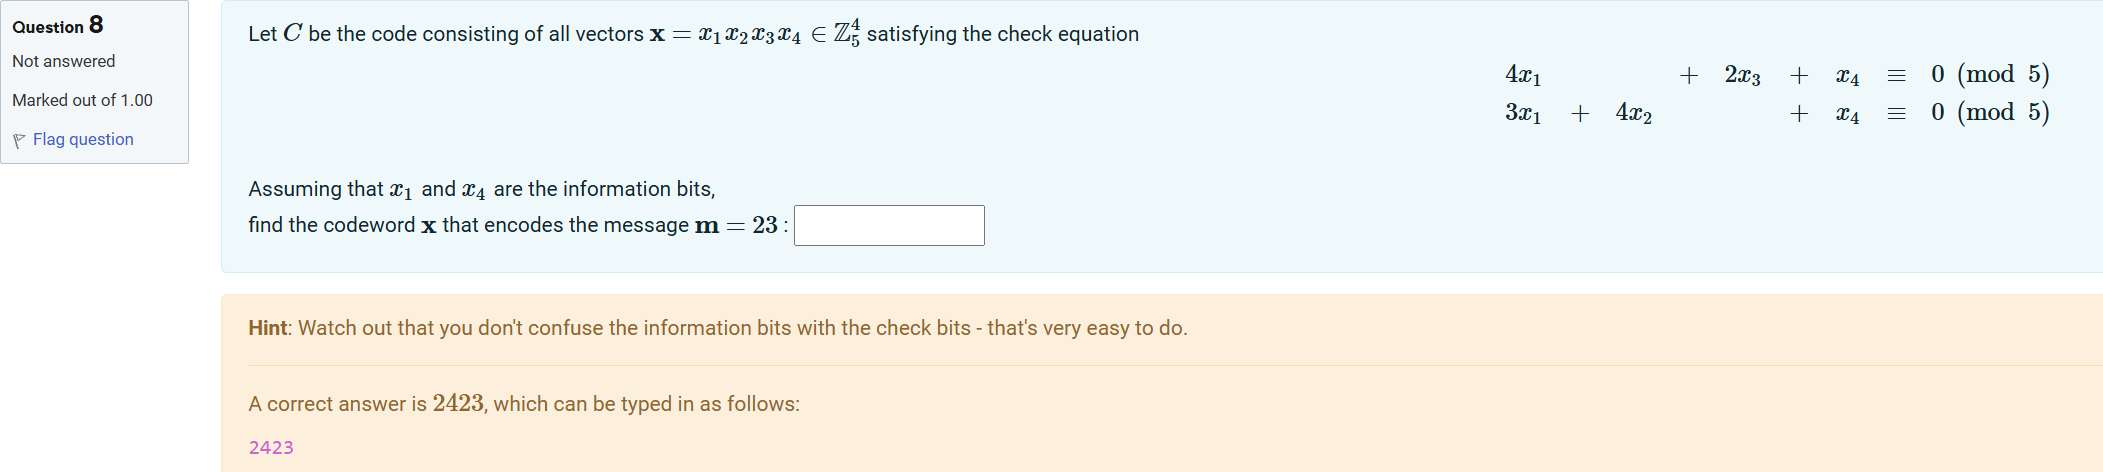

In [6]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q8.png')

$$
\text{Let } \mathcal{C} \text{ be the code consisting of all vectors } \mathbf{x} = (x_1, x_2, x_3, x_4) \in \mathbb{Z}_5^4 \text{ satisfying the check equations:}
$$

$$
4x_1 + 2x_3 + x_4 \equiv 0 \ (\text{mod} \ 5)
$$

$$
3x_1 + 4x_2 + x_4 \equiv 0 \ (\text{mod} \ 5)
$$

$$
\text{Assuming that } x_1 \text{ and } x_4 \text{ are the information bits, find the codeword } \mathbf{x} \text{ that encodes the message } m = 23.
$$


In [9]:
import numpy as np

def solve_codeword(m):
    """
    Solve for codeword given message m and check equations in Z_5
    x1 and x4 are information bits (given message: m = 23 -> x1 = 2, x4 = 3)
    Need to solve for x2 and x3 using check equations:
    4x1         + 2x3 + x4 ≡ 0 (mod 5)
    3x1 + 4x2        + x4 ≡ 0 (mod 5)
    """
    
    # Break message into information bits
    x1 = m // 10  # First digit
    x4 = m % 10   # Second digit
    
    # Create system of equations mod 5
    # From first equation: 4x1 + 2x3 + x4 ≡ 0 (mod 5)
    # From second equation: 3x1 + 4x2 + x4 ≡ 0 (mod 5)
    
    # Solve for x2 from second equation:
    # 3x1 + 4x2 + x4 ≡ 0 (mod 5)
    # 4x2 ≡ -(3x1 + x4) (mod 5)
    # x2 ≡ -4⁻¹(3x1 + x4) (mod 5)
    # 4⁻¹ ≡ 4 (mod 5) because 4 * 4 ≡ 1 (mod 5)
    x2 = (-4 * (3*x1 + x4)) % 5
    
    # Solve for x3 from first equation:
    # 4x1 + 2x3 + x4 ≡ 0 (mod 5)
    # 2x3 ≡ -(4x1 + x4) (mod 5)
    # x3 ≡ -2⁻¹(4x1 + x4) (mod 5)
    # 2⁻¹ ≡ 3 (mod 5) because 2 * 3 ≡ 1 (mod 5)
    x3 = (-3 * (4*x1 + x4)) % 5
    
    # Combine digits to form codeword
    codeword = 1000*x1 + 100*x2 + 10*x3 + x4
    
    # Verify solution
    check1 = (4*x1 + 2*x3 + x4) % 5
    check2 = (3*x1 + 4*x2 + x4) % 5
    
    print(f"Verification:")
    print(f"x1 = {x1}, x2 = {x2}, x3 = {x3}, x4 = {x4}")
    print(f"Check equation 1: 4x1 + 2x3 + x4 ≡ {check1} (mod 5)")
    print(f"Check equation 2: 3x1 + 4x2 + x4 ≡ {check2} (mod 5)")
    
    return codeword

# Given message m = 23
m = 23
result = solve_codeword(m)
print(f"\nCodeword that encodes message {m} is: {result}")

Verification:
x1 = 2, x2 = 4, x3 = 2, x4 = 3
Check equation 1: 4x1 + 2x3 + x4 ≡ 0 (mod 5)
Check equation 2: 3x1 + 4x2 + x4 ≡ 0 (mod 5)

Codeword that encodes message 23 is: 2423


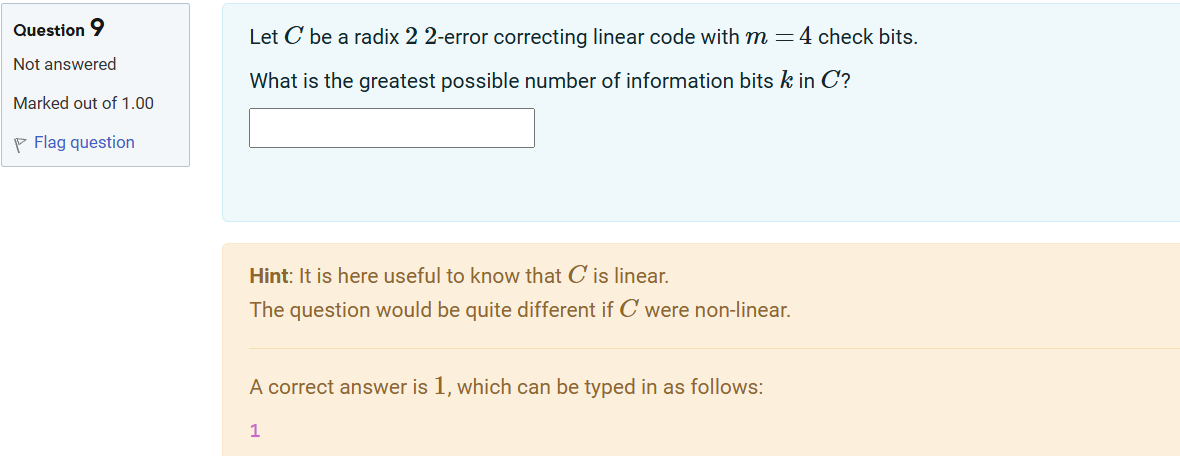

In [10]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q9.png')

Let C be a radix \( 2 \), 2-error correcting linear code with \( m = 4 \) check bits.

What is the greatest possible number of information bits \( k \) in \( \mathcal{C} \)?


In [11]:
import math

def calculate_max_info_bits(m, t):
    """
    Calculate maximum number of information bits k for t-error correcting code
    Parameters:
    m = number of check bits
    t = number of errors the code can correct
    
    For a t-error correcting code in radix 2:
    2^m ≥ 1 + C(n,1) + C(n,2) + ... + C(n,t)
    where n = m + k (total bits)
    """
    
    def combination(n, r):
        """Calculate C(n,r)"""
        if r > n:
            return 0
        return math.comb(n, r)
    
    def sum_combinations(n, t):
        """Sum of combinations C(n,1) + C(n,2) + ... + C(n,t)"""
        return sum(combination(n, i) for i in range(t + 1))
    
    # Binary search for maximum valid n
    left = m  # minimum possible n (if k=0)
    right = 2**m  # reasonable upper bound
    max_valid_n = m
    
    while left <= right:
        mid = (left + right) // 2
        # Check if this n satisfies the inequality
        if 2**m >= sum_combinations(mid, t):
            max_valid_n = mid
            left = mid + 1
        else:
            right = mid - 1
    
    # k = n - m
    max_k = max_valid_n - m
    
    # Print verification
    n = m + max_k
    print(f"Verification:")
    print(f"m (check bits) = {m}")
    print(f"t (errors) = {t}")
    print(f"n (total bits) = {n}")
    print(f"Sum of combinations up to {t} errors = {sum_combinations(n, t)}")
    print(f"2^m = {2**m}")
    print(f"Inequality satisfied: 2^{m} = {2**m} ≥ {sum_combinations(n, t)}")
    
    return max_k

# Parameters for this problem
m = 4  # number of check bits
t = 2  # 2-error correcting

# Calculate maximum k
max_k = calculate_max_info_bits(m, t)
print(f"\nMaximum number of information bits k = {max_k}")

Verification:
m (check bits) = 4
t (errors) = 2
n (total bits) = 5
Sum of combinations up to 2 errors = 16
2^m = 16
Inequality satisfied: 2^4 = 16 ≥ 16

Maximum number of information bits k = 1


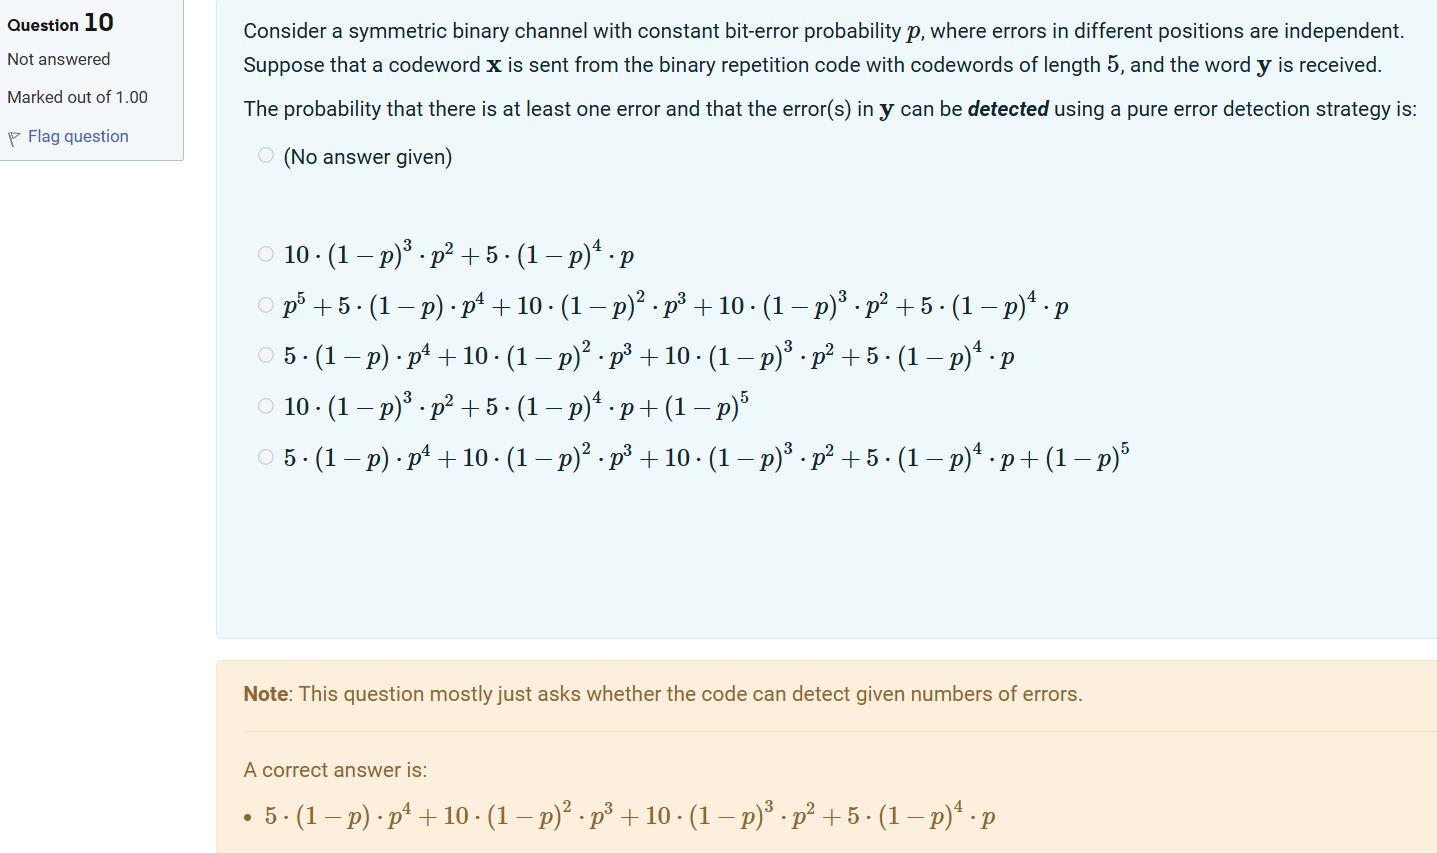

In [12]:
from IPython.display import Image

# Use the absolute path
Image('/home/cbjs/math3411/test1/test1q10.png')